In [1]:
#import scltnn
import scanpy as sc
import scvelo as scv
import anndata
import numpy as np

In [2]:
import omicverse as ov
ov.utils.ov_plot_set()

2024-12-14 12:54:17.308247: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-14 12:54:17.421313: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-14 12:54:17.460436: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-14 12:54:23.350112: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT



   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.6.9, Tutorials: https://omicverse.readthedocs.io/
Dependency error: (pydeseq2 0.4.11 (/mnt/home/zehuazeng/software/rsc/lib/python3.10/site-packages), Requirement.parse('pydeseq2<=0.4.0,>=0.3'))


In [4]:
adata_pancera=sc.read('data/tsp1_bladder_mesenchymeToMyofibroblast_forPaper.h5ad')
adata_pancera

AnnData object with n_obs × n_vars = 3965 × 2000
    obs: 'X10X_run', 'smartseq2_barcode', 'smartseq2_library_plate', 'smartseq2_sorting_direction', 'smartseq2_sort_order', 'smartseq2_cDNA_Plate', 'method', 'donor', 'X10X_replicate', 'sequencer', 'sex', 'tissue', 'smartseq2_well_seq', 'notes', 'smartseq2_sorted_population', 'X10X_sample', 'anatomical_position', 'X10X_barcode', 'n_counts', 'n_genes', 'manual_cell_ontology_class', 'manual_annotation', 'doublet_filter', 'compartment', 'batch', 'compartment_pred', 'leiden', 'cluster_id', 'Propagated.Annotation', 'Entropy.All.Methods', 'Entropy.kNN.Reps', 'Entropy.scANVI.Reps', 'Entropy.SVM.Reps', 'Potential.Doublets', 'Onclass', 'singlecellNet', 'kNN', 'SVM', 'scANVI', 'compartment_pred_svm', 'manual_cell_ontology_classcollapsed', 'Propagated.Annotationcollapsed', 'Onclasscollapsed', 'singlecellNetcollapsed', 'kNNcollapsed', 'SVMcollapsed', 'scANVIcollapsed', 'miscompartmentalized', 'log_n_counts', 'log_n_genes', 'donor_method', 'decontX_c

In [19]:
adata_pancera.obs['manual_annotation']

cell_id
AAACGAAGTGAGTAAT_TSP1_bladder_1-0    mesenchymal cell 2
AAACGCTAGAGCTGAC_TSP1_bladder_1-0    mesenchymal cell 2
AAACGCTCAACTCGTA_TSP1_bladder_1-0    mesenchymal cell 1
AAACGCTGTCATCGCG_TSP1_bladder_1-0    mesenchymal cell 1
AAAGAACCAGGAAGTC_TSP1_bladder_1-0    myofibroblast cell
                                            ...        
TTTCCTCTCTACTGAG_TSP1_bladder_2-0    mesenchymal cell 2
TTTCGATCACTACACA_TSP1_bladder_2-0    mesenchymal cell 2
TTTGACTAGCACCTGC_TSP1_bladder_2-0    myofibroblast cell
TTTGATCAGTTAGTGA_TSP1_bladder_2-0    mesenchymal cell 2
TTTGTTGCACTGCTTC_TSP1_bladder_2-0    mesenchymal cell 2
Name: manual_annotation, Length: 3965, dtype: category
Categories (4, object): ['mesenchymal cell 1', 'mesenchymal cell 2', 'mesenchymal cell 3', 'myofibroblast cell']

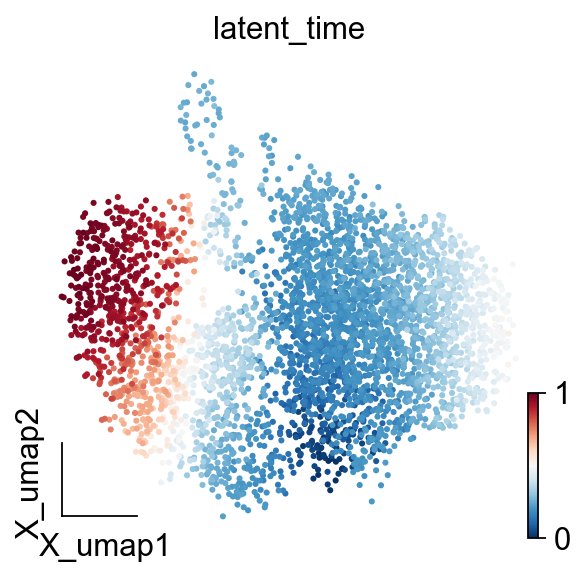

In [7]:
ov.pl.embedding(
    adata_pancera,
    basis='X_umap',
    color='latent_time',
    frameon='small'
)

In [5]:
adata_pancera.X.max()

6.637926

In [8]:
import Epiverse as ev
ev.utils.lsi(adata_pancera, n_components=20, n_iter=15)

In [11]:
#import scltnn
ltnn_obj=ov.single.scLTNN(adata_pancera,basis='X_lsi',input_dim=20,)

In [50]:
ltnn_obj.ANNmodel_load('../LTNN/model/model_human.h5')
ltnn_obj.cal_paga(use_rep='X_scvi',resolution=2)
ltnn_obj.cal_model_time()

......calculate paga
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 24 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
......predict model_time


In [51]:
ltnn_obj.cal_exp_gene_value(rev=False,mode='ann')

filtered out 1815 cells that have less than 200 genes expressed
filtered out 384 genes that are detected in less than 3 cells


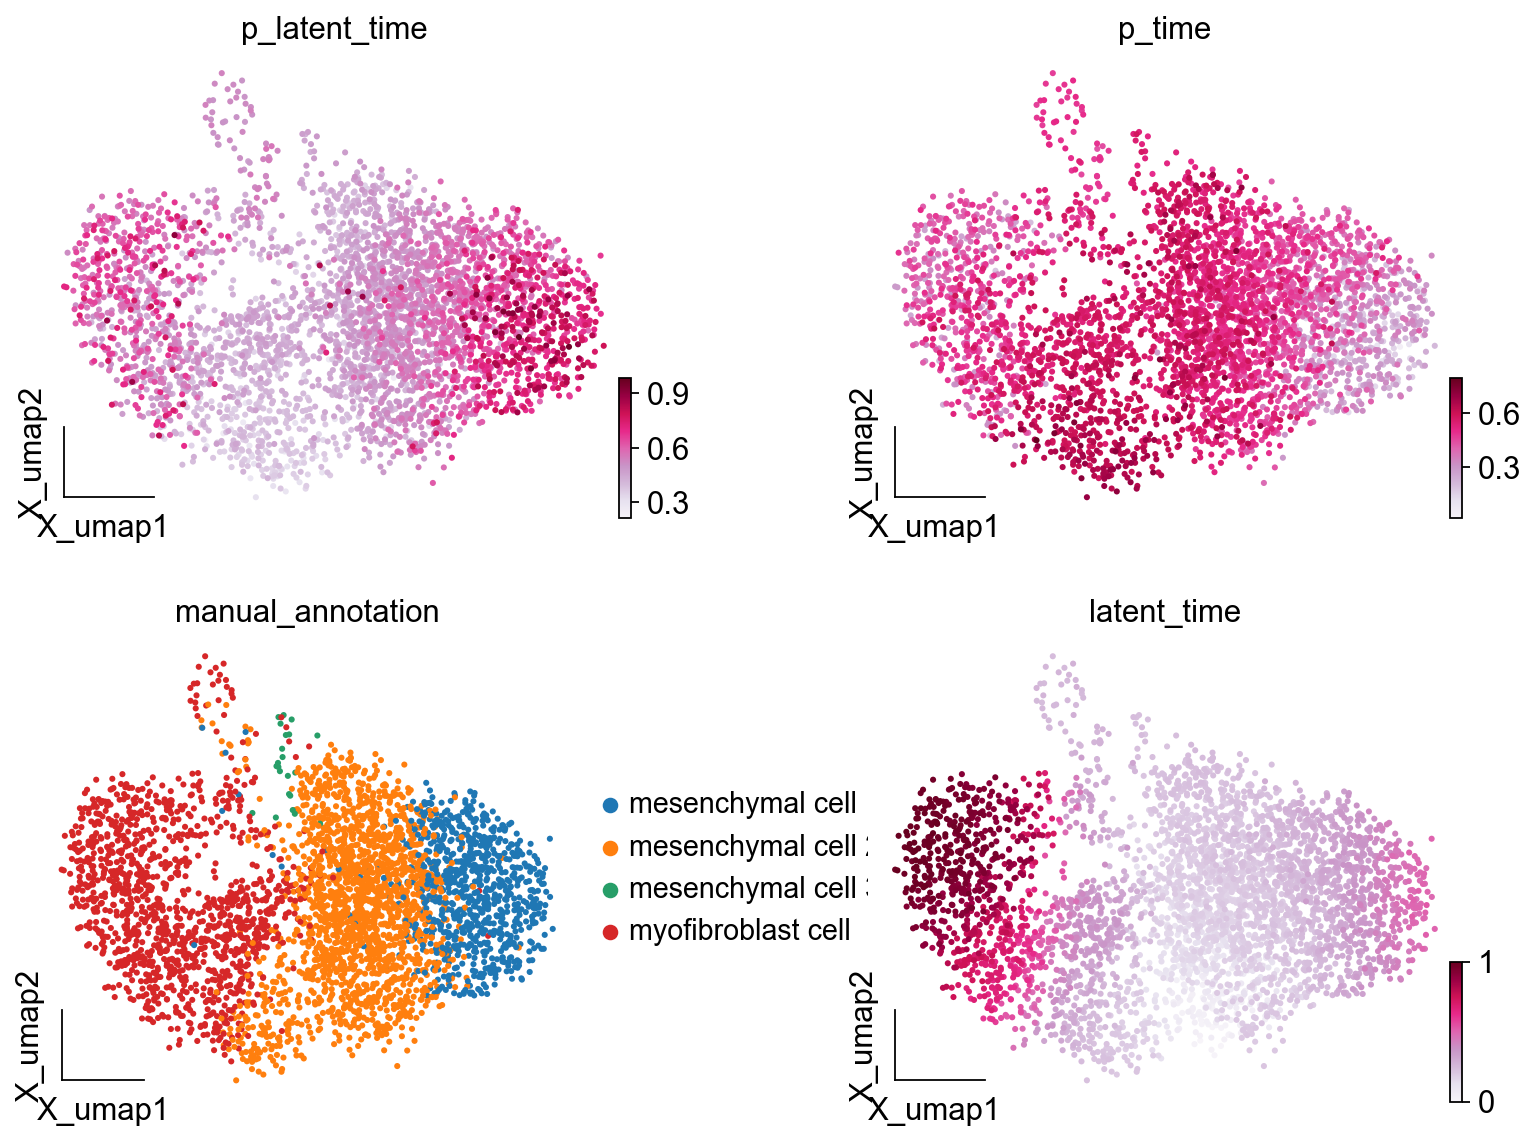

In [52]:
ov.utils.embedding(adata_pancera,basis='X_umap', 
                   color=['p_latent_time','p_time','manual_annotation','latent_time'], 
               cmap='PuRd',legend_loc='right margin',frameon='small',ncols=2,wspace=0.4)

In [55]:
ltnn_obj.cal_dpt_pseudotime(leiden_range_start=0.05,leiden_range_mid=0.1,leiden_range_end=0.2)

......calculate dpt_pseudotime
computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.98744845 0.9693261  0.9562469  0.9503117  0.94685936
     0.93743503 0.9348886  0.92644703 0.9159724  0.91455555 0.9068995
     0.8976547  0.8934452  0.8926275 ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:01)
computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)
......leiden_start: ['2']
......leiden_middle ['5', '21', '22', '13', '12', '1', '17', '11', '18', '6', '4', '23', '16', '0', '15', '8', '19', '3', '10', '9', '20']
......leiden_end ['14']


--> added 'pos', the PAGA positions (adata.uns['paga'])


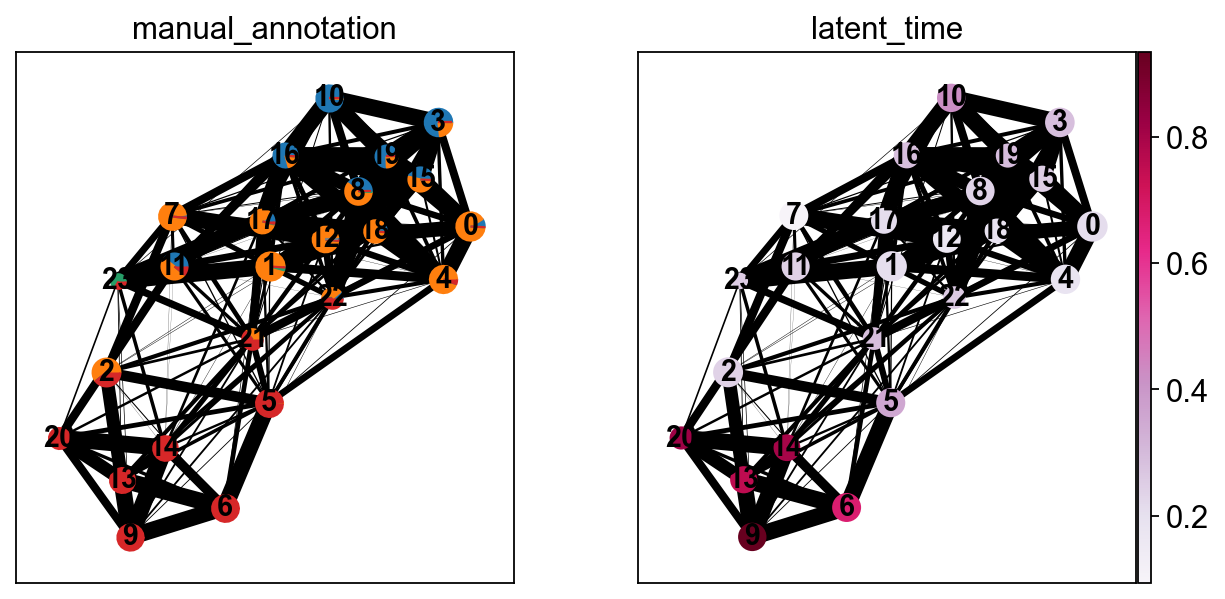

In [54]:
sc.pl.paga(ltnn_obj.adata, color=['manual_annotation','latent_time'],cmap='PuRd',)
          #title=['Panceras\nStage','Panceras\ndpt_pseudotime'],)
          #save='_fig3_pancreas.png')

In [56]:
ltnn_obj.ANN(batch_size=30,n_epochs=200,verbose=0)

......ANN


ANN model: 100%|██████████| 200/200 [01:39<00:00,  2.02it/s, val loss, val mae=0.00682, 0.00682]


In [57]:
ltnn_obj.cal_distrubute()
ltnn_obj.cal_scLTNN_time()

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.03 sec] [RSS: 134.358] [loc=0.488 scale=0.116]
[distfit] >INFO> [expon     ] [0.01 sec] [RSS: 384.281] [loc=0.000 scale=0.488]
[distfit] >INFO> [pareto    ] [0.06 sec] [RSS: 384.281] [loc=-67108864.000 scale=67108864.000]


......Dweibull analysis


[distfit] >INFO> [dweibull  ] [0.21 sec] [RSS: 167.933] [loc=0.520 scale=0.064]
[distfit] >INFO> [t         ] [0.59 sec] [RSS: 12.7082] [loc=0.517 scale=0.045]
[distfit] >INFO> [genextreme] [0.89 sec] [RSS: 177.479] [loc=0.440 scale=0.139]
[distfit] >INFO> [gamma     ] [0.20 sec] [RSS: 149.159] [loc=-1.610 scale=0.007]
[distfit] >INFO> [lognorm   ] [0.39 sec] [RSS: 133.513] [loc=-114.657 scale=115.146]
[distfit] >INFO> [beta      ] [0.37 sec] [RSS: 109.604] [loc=-14363.790 scale=14364.914]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 339.794] [loc=0.000 scale=1.000]
[distfit] >INFO> [loggamma  ] [0.03 sec] [RSS: 93.362] [loc=0.318 scale=0.175]
[distfit] >INFO> [norm      ] [2.84 sec] [RSS: 134.358] [loc=0.488 scale=0.116]
[distfit] >INFO> [expon     ] [2.80 sec] [RSS: 384.281] [loc=0.000 scale=0.488]
[distfit] >INFO> [pareto    ] [2.79 sec] [RSS: 384.281] [loc=-67108864.000 scale=67108864.000]
[distfit] >INFO> [dweibull  ] [2.73 sec] [RSS: 167.933] [loc=0.520 scale=0.064]
[distfit] >

......Norm analysis


[distfit] >INFO> [t         ] [0.37 sec] [RSS: 8.86761] [loc=0.520 scale=0.045]
[distfit] >INFO> [genextreme] [0.73 sec] [RSS: 188.684] [loc=0.451 scale=0.170]
[distfit] >INFO> [gamma     ] [0.17 sec] [RSS: 159.828] [loc=-2.946 scale=0.007]
[distfit] >INFO> [lognorm   ] [0.39 sec] [RSS: 154.937] [loc=-59.740 scale=60.250]
[distfit] >INFO> [beta      ] [0.44 sec] [RSS: 153.528] [loc=-120.233 scale=124.870]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 322.151] [loc=-0.021 scale=1.188]
[distfit] >INFO> [loggamma  ] [0.16 sec] [RSS: 153.611] [loc=-10.326 scale=2.073]
[distfit] >INFO> [norm      ] [2.47 sec] [RSS: 154.839] [loc=0.510 scale=0.152]
[distfit] >INFO> [expon     ] [2.46 sec] [RSS: 353.629] [loc=-0.021 scale=0.531]
[distfit] >INFO> [pareto    ] [2.46 sec] [RSS: 353.629] [loc=-67108864.021 scale=67108864.000]
[distfit] >INFO> [dweibull  ] [2.45 sec] [RSS: 88.2146] [loc=0.521 scale=0.073]
[distfit] >INFO> [t         ] [2.30 sec] [RSS: 8.86761] [loc=0.520 scale=0.045]
[distfit] >I

......calculate scLTNN time


In [58]:
import scvelo as scv
scv.tl.paga(ltnn_obj.adata, groups='leiden',
            vkey='paga',use_time_prior='LTNN_time')

running PAGA using priors: ['LTNN_time']
    finished (0:00:02) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


In [63]:
ltnn_obj.adata

AnnData object with n_obs × n_vars = 3965 × 2000
    obs: 'X10X_run', 'smartseq2_barcode', 'smartseq2_library_plate', 'smartseq2_sorting_direction', 'smartseq2_sort_order', 'smartseq2_cDNA_Plate', 'method', 'donor', 'X10X_replicate', 'sequencer', 'sex', 'tissue', 'smartseq2_well_seq', 'notes', 'smartseq2_sorted_population', 'X10X_sample', 'anatomical_position', 'X10X_barcode', 'n_counts', 'n_genes', 'manual_cell_ontology_class', 'manual_annotation', 'doublet_filter', 'compartment', 'batch', 'compartment_pred', 'leiden', 'cluster_id', 'Propagated.Annotation', 'Entropy.All.Methods', 'Entropy.kNN.Reps', 'Entropy.scANVI.Reps', 'Entropy.SVM.Reps', 'Potential.Doublets', 'Onclass', 'singlecellNet', 'kNN', 'SVM', 'scANVI', 'compartment_pred_svm', 'manual_cell_ontology_classcollapsed', 'Propagated.Annotationcollapsed', 'Onclasscollapsed', 'singlecellNetcollapsed', 'kNNcollapsed', 'SVMcollapsed', 'scANVIcollapsed', 'miscompartmentalized', 'log_n_counts', 'log_n_genes', 'donor_method', 'decontX_c

--> added 'pos', the PAGA positions (adata.uns['paga'])


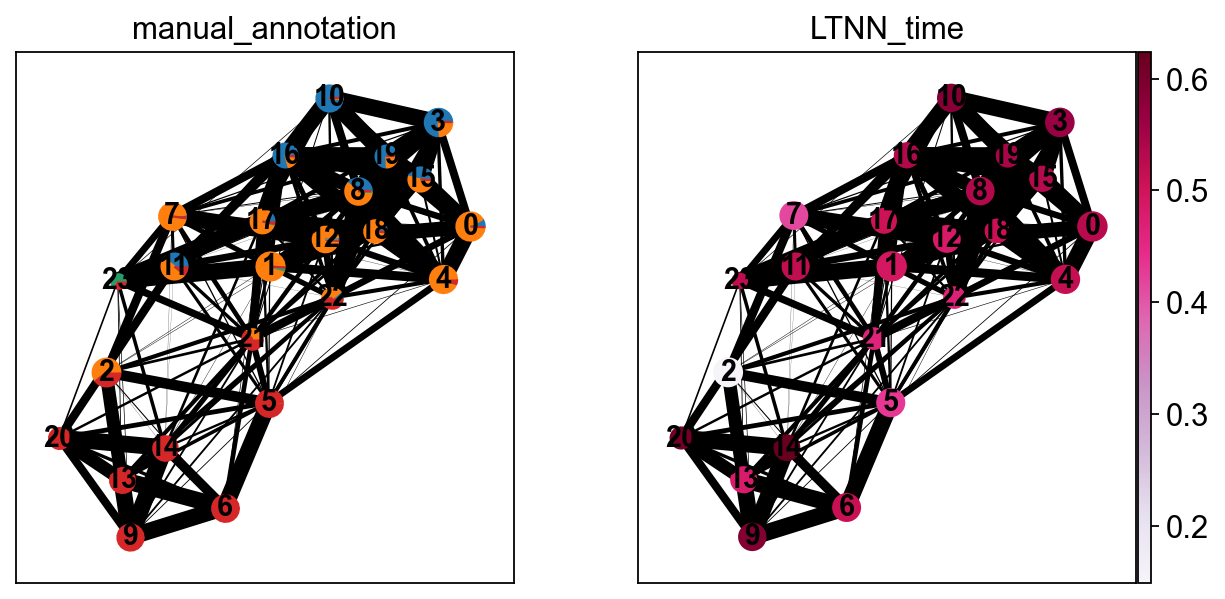

In [59]:
sc.pl.paga(ltnn_obj.adata, color=['manual_annotation','LTNN_time'],cmap='PuRd',
          #title=['Panceras\nStage','Panceras\nLTNN_time'],
          )
          #save='_fig3_pancreas.png')

In [68]:
import torch
X_val=ltnn_obj.adata.obsm[ltnn_obj.basis]
X_val = torch.tensor(X_val, dtype=torch.float32).to(ltnn_obj.device)

In [69]:
import torch.nn.functional as F
x=ltnn_obj.model.fc1(X_val)
x=F.relu(x)
x=ltnn_obj.model.fc2(x)
x=F.relu(x)
x=ltnn_obj.model.fc3(x)

In [70]:
ltnn_obj.adata.obsm['X_ltnn']=x.cpu().detach().numpy()

In [81]:
sc.pp.neighbors(ltnn_obj.adata,use_rep='X_ltnn')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


In [82]:
import scvelo as scv
ltnn_obj.adata.uns['paga_graph']=ltnn_obj.adata.obsp['connectivities']

In [83]:
import scvelo as scv
scv.tl.paga(ltnn_obj.adata, groups='manual_annotation',
            vkey='paga',use_time_prior='LTNN_time')

running PAGA using priors: ['LTNN_time']
    finished (0:00:01) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


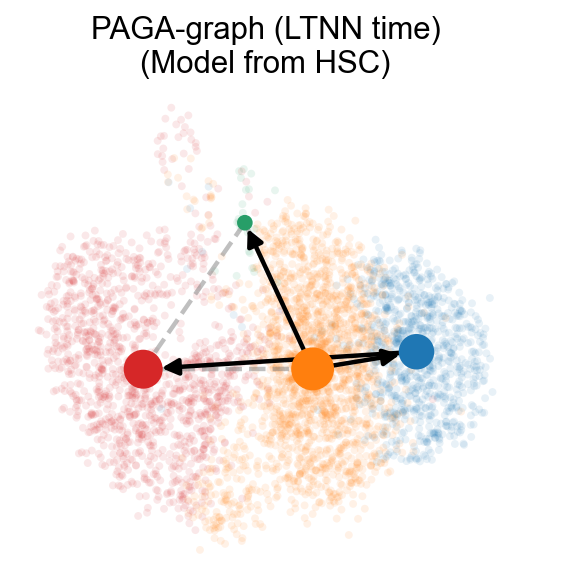

In [84]:
#fig, ax = plt.subplots(figsize=(3,3))
import matplotlib.pyplot as plt
ax=scv.pl.paga(ltnn_obj.adata, basis='umap', size=50, alpha=.1,title='PAGA-graph (LTNN_time)\n(Model from HSC)',
            min_edge_width=2, node_size_scale=1.5,show=False,legend_loc=False)
plt.savefig("figures/review/bladder_paga_graph_ltnn.png",dpi=300,bbox_inches = 'tight')

In [75]:
sc.pp.neighbors(ltnn_obj.adata,use_rep='X_scvi')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


In [76]:
import scvelo as scv
ltnn_obj.adata.uns['paga_graph']=ltnn_obj.adata.obsp['connectivities']

In [77]:
import scvelo as scv
scv.tl.paga(ltnn_obj.adata, groups='manual_annotation',
            vkey='paga',use_time_prior='latent_time')

running PAGA using priors: ['latent_time']
    finished (0:00:01) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


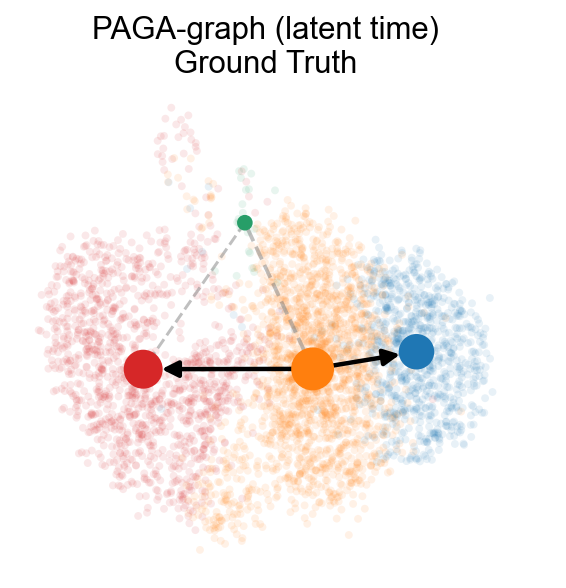

In [78]:
#fig, ax = plt.subplots(figsize=(3,3))
import matplotlib.pyplot as plt
ax=scv.pl.paga(ltnn_obj.adata, basis='umap', size=50, alpha=.1,title='PAGA-graph (latent_time)\nGround Truth',
            min_edge_width=2, node_size_scale=1.5,show=False,legend_loc=False)
plt.savefig("figures/review/bladder_paga_graph_ground.png",dpi=300,bbox_inches = 'tight')

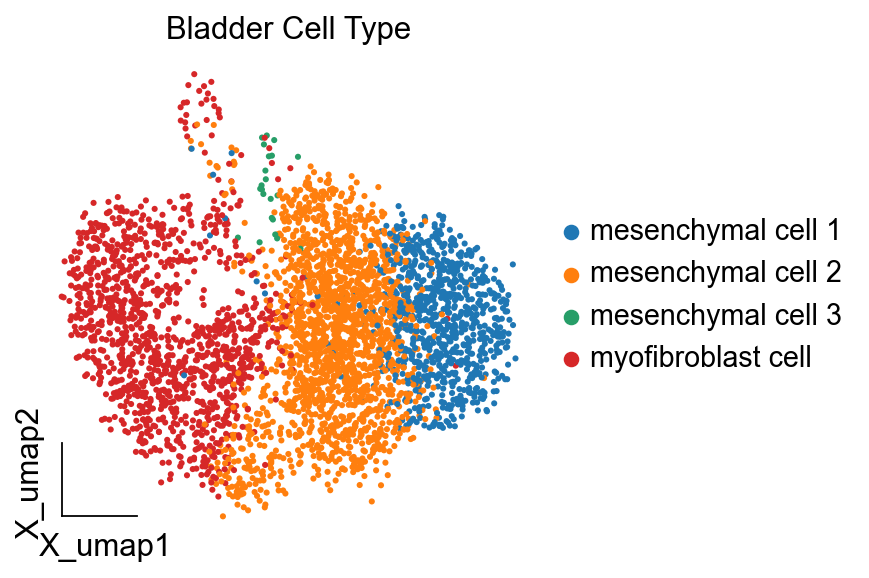

In [80]:
ov.pl.embedding(
    adata_pancera,
    basis='X_umap',
    color='manual_annotation',
    frameon='small',show=False,
)
plt.title('Bladder Cell Type')
plt.savefig("figures/review/bladder_ct.png",dpi=300,bbox_inches = 'tight')